In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SF Prelab 1 Code

Hamish Johnson | PHYS 332 W | SFU Spring 2022

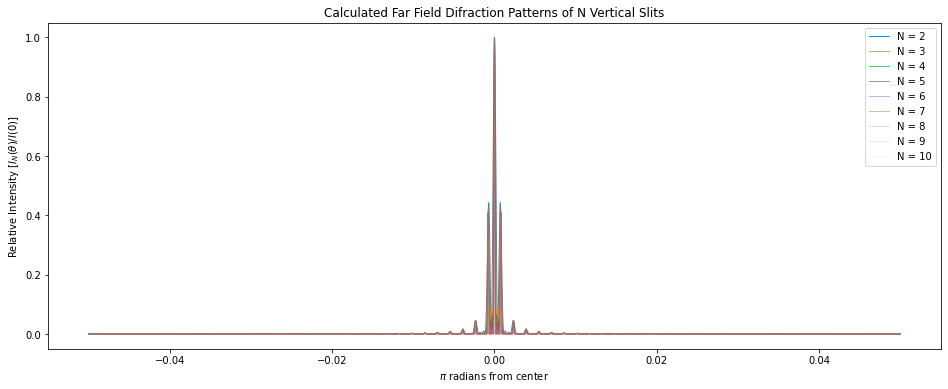

Now we put it in units of $\beta$ like in the textbook!


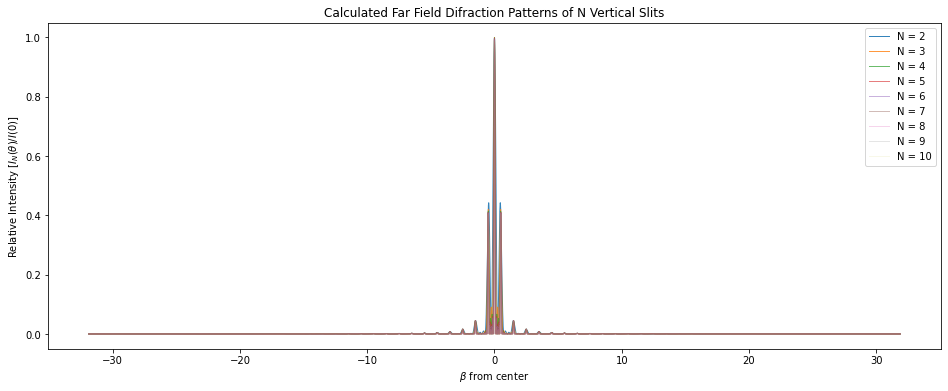

To compare to the text we limit the x-range in beta to +/- 4$\pi$ [betas]


In [ ]:
def n_slitDiffraction(theta,wavelength,a,b,N):
    pi = np.pi
    beta = pi*b/(wavelength)*np.sin(theta)
    alpha = pi*a/(wavelength)*np.sin(theta)
    
    relativeIntensity = ((np.sin(beta)/beta)**2)*((np.sin(N*alpha)/np.sin(alpha))**2)/N**2
    return relativeIntensity

wavelength = 515 * 10**(-9) # nm -> m
a = 0.21 * 10**(-3) # mm -> m
b = a/2 # m
f = 180*10**-3

minTheta = -np.pi/20
maxTheta =  np.pi/20

Nums = 9
Num_min = 2
Num_interval = 1
Num_stop = Num_min+(Nums-1)*Num_interval + 1

fig = plt.figure(figsize = (16,6))
xspace = np.linspace(minTheta/np.pi,maxTheta/np.pi,10000)
for N in np.arange(Num_min,Num_stop,Num_interval):
    alph = 1*(1-(N-1)/(Num_stop-1))
    plt.plot(xspace,n_slitDiffraction(xspace*np.pi,wavelength,a,b,N),label = f"N = {N}",linewidth = 1,alpha = alph)
             
plt.legend()
plt.ylabel(r"Relative Intensity [$I_N(\theta)$/$I(0)$]")
plt.xlabel(r"$\pi$ radians from center")
plt.title("Calculated Far Field Difraction Patterns of N Vertical Slits")
plt.show()

print(r"Now we put it in units of $\beta$ like in the textbook!")

fig = plt.figure(figsize = (16,6))
xspace = np.linspace(minTheta,maxTheta,10000) # units of radians
bspace = (b)/(wavelength)*np.sin(xspace) # in units of pi
for N in np.arange(Num_min,Num_stop,Num_interval):
    alph = 1*(1-(N-1)/(Num_stop-1))
    plt.plot(bspace,n_slitDiffraction(xspace,wavelength,a,b,N),label = f"N = {N}",linewidth = 1,alpha = alph)
             
plt.legend()
plt.ylabel(r"Relative Intensity [$I_N(\theta)$/$I(0)$]")
plt.xlabel(r"$\beta$ from center")
plt.title("Calculated Far Field Difraction Patterns of N Vertical Slits")
plt.show()

print("To compare to the text we limit the x-range in beta to +/- 4$\pi$ [betas]")

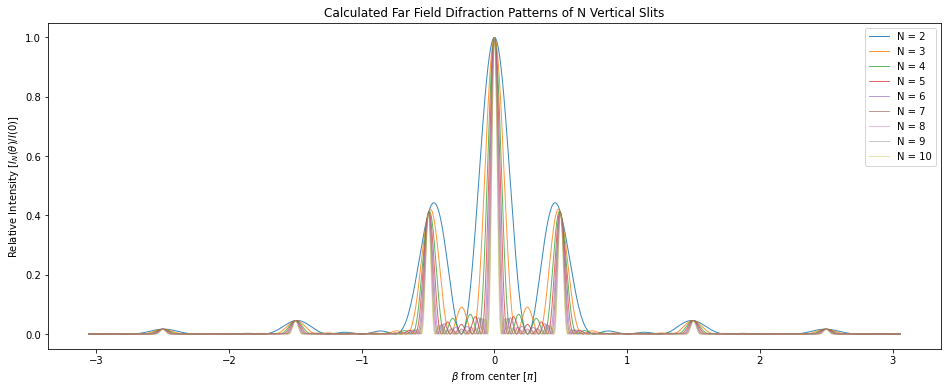

Now for better understanding lets plot contributions for first 5 components!


In [ ]:
minTheta = -0.015
maxTheta =  0.015

fig = plt.figure(figsize = (16,6))
xspace = np.linspace(minTheta,maxTheta,10000) # units of radians
bspace = (b)/(wavelength)*np.sin(xspace) # in units of pi
for N in np.arange(Num_min,Num_stop,Num_interval):
    alph = 1*(1-0.6*(N)/(Num_stop-1))
    plt.plot(bspace,n_slitDiffraction(xspace,wavelength,a,b,N),label = f"N = {N}",linewidth = 1,alpha = alph)
             
plt.legend()
plt.ylabel(r"Relative Intensity [$I_N(\theta)$/$I(0)$]")
plt.xlabel(r"$\beta$ from center [$\pi$]")
plt.title("Calculated Far Field Difraction Patterns of N Vertical Slits")
plt.show()

print("Now for better understanding lets plot contributions for first 5 components!")

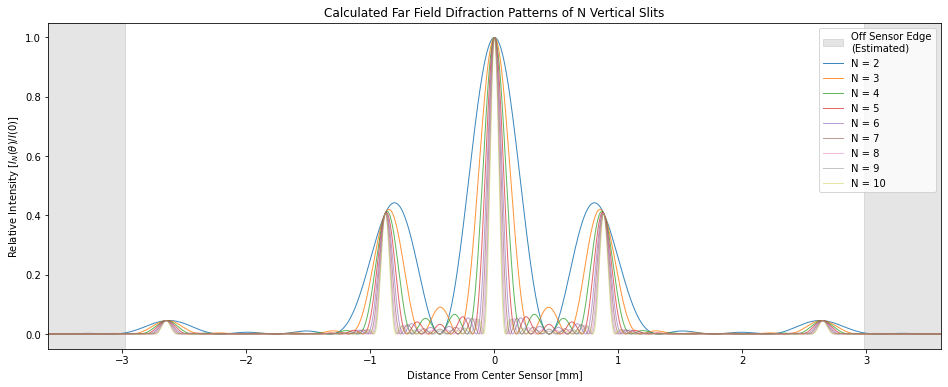

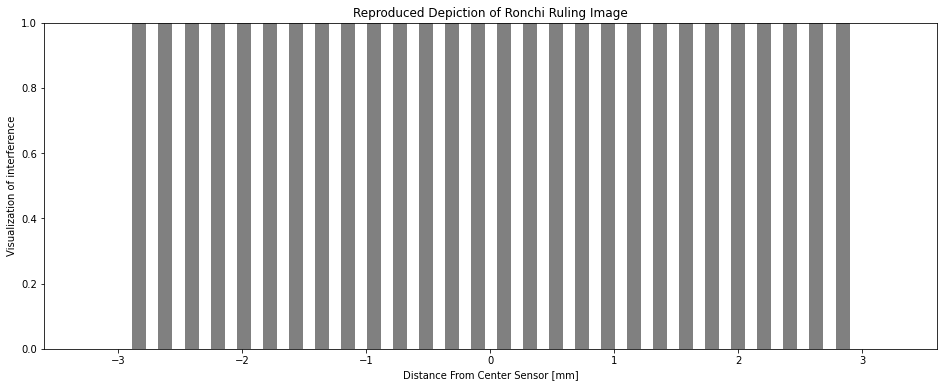

In [ ]:
minTheta = -0.015
maxTheta =  0.015

fig = plt.figure(figsize = (16,6))
# sensor is approx 5.95585 mm accross so lets darken the other area
sensorMaxEdge = 5.95585/2 # mm
plt.axvspan(-10,-sensorMaxEdge,color = "k",alpha = 0.1,label = "Off Sensor Edge\n(Estimated)")
plt.axvspan(10,sensorMaxEdge,color = "k",alpha = 0.1)

xspace = np.linspace(minTheta,maxTheta,10000) # units of radians
bspace = (b)/(wavelength)*np.sin(xspace) # in units of pi
physspace = (2*f)*np.tan(xspace)
for N in np.arange(Num_min,Num_stop,Num_interval):
    alph = 1*(1-0.6*N/(Num_stop-1))
    plt.plot(physspace*1000,n_slitDiffraction(xspace,wavelength,a,b,N),label = f"N = {N}",linewidth = 1,alpha = alph)
             
plt.legend()
plt.xlim(-3.6,3.6)
plt.ylabel(r"Relative Intensity [$I_N(\theta)$/$I(0)$]")
plt.xlabel(r"Distance From Center Sensor [mm]")
plt.title("Calculated Far Field Difraction Patterns of N Vertical Slits")
plt.savefig("plot-for-FS-Prelab-1.pdf",dpi = 300)
plt.show()

# for fun lets plot the simulated real image of these flits according to our estimate of the rulings
Q = 14
fig = plt.figure(figsize = (16,6))
for _ in range(Q*2):
    midloc = (_-(Q-1/2))*a
    x_min =  midloc - b/2
    x_max =  midloc + b/2
    plt.axvspan(x_min*1000,x_max*1000,color = "grey")

plt.xlim(-3.6,3.6)
plt.ylabel(r"Visualization of interference")
plt.xlabel(r"Distance From Center Sensor [mm]")
plt.title("Reproduced Depiction of Ronchi Ruling Image")
plt.savefig("generated-real-image.pdf",dpi=300)
plt.show()

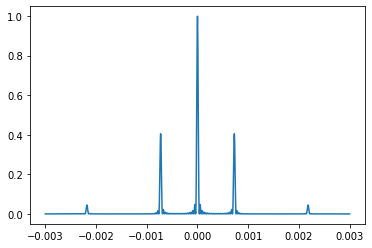

In [ ]:
# Write out a fxn to fit in lab
def n_slitDiffraction(theta,wavelength,a,b,N):
    pi = np.pi
    beta = pi*b/(wavelength)*np.sin(theta)
    alpha = pi*a/(wavelength)*np.sin(theta)
    
    relativeIntensity = ((np.sin(beta)/beta)**2)*((np.sin(N*alpha)/np.sin(alpha))**2)/N**2
    return relativeIntensity

def fourierSpaceCallibrationModel(x,a,D,N = 20,wavelength = 515*10**(-9)):
    b = a/2
    theta = np.arctan(x/D)
    intensity = n_slitDiffraction(theta,wavelength,a,b,N)
    return x, intensity

a = 0.2*10**(-3)
D = 282.2*10**(-3)

x = np.linspace(-3,3,5000)*10**(-3)
x, y = fourierSpaceCallibrationModel(x,a,D)

plt.plot(x,y)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=105ac642-5bd3-436e-9985-a9ec79bce1b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>